# Relazione terzo progetto algoritmi avanzati

Francesca Meneghello 1227939 <br />
Leonardo Pratesi 1237582

## 1. Introduzione

Una iniziale implementazione prevedeva l'utilizzo di un dizionario contente coppie chiave valore ('id nodo' : \[array nodi adiacenti\]), in modo random veniva selezionata una chiave dall'array e successivamente un nodo adiacente dall'array di nodi adiacenti in modo da selezionare un arco randomico. Le chiavi dei due nodi venivano eliminate dal dizionario e veniva creata una nuova chiave fittizia che identificava il nodo nato dalla procedura di Contraction.
Successivamente tutti i valori delle chiavi venivano analizzati per sostiuire tutte le occorrenze dei due nodi eliminato con il nodo fittizio.
Tuttavia questa implementazione si è dimostrata molto inefficente dal punto di vista computazionale ed inoltre la selezione dell'arco casuale non rispettava la condizione di probabilità uniforme richiesta dall'algoritmo di Karger.  </br>
Si è optato quindi per un implementazione attraverso una semplice lista che conserva tutti gli archi come coppie di tuple (nodo, nodo) che si è dimostrata molto più efficiente.

In [32]:
import Contraction as c
import math
import time

lista, nodi= c.ListEdge('input_random_1_6.txt')
print(lista)

[('5', '6'), ('1', '4'), ('2', '6'), ('1', '3'), ('3', '5'), ('4', '5'), ('1', '2'), ('2', '5'), ('2', '4')]


# Full Contraction

L'algorimto di Full Contraction prende in input il nome del file contenente la matrice di adiacenza, genera la lista di archi attraverso il metodo ListEdge e salva il numero totale di nodi nel grafo. L'algoritmo seleziona un arco casuale della lista e lo elimina insieme a tutto i suoi duplicati, elimina i due nodi e riposiziona gli archi. Quando gli archi rimanenti sono solo 2, l'algoritmo si interrompe e ritorna la lunghezza della lista di archi. [CONTINUA]


In [33]:
def FullContraction(filename):
    edges, nodes= ListEdge(filename) #lista archi #
    while nodes>2:
        x= random.choice(edges) ## estrazione casuale arco ##
        nodea= x[0]
        nodeb= x[1]
        #### rimuovere arco selezionato e gli eventuali duplicati ####
        while x in edges:
            edges.remove(x)
        nodes=nodes-1
        ### sostituire con nuovo nodo e riposizionare gli archi corretti ###
        edges=changeEdge(edges, nodea, nodeb)  
        
    #print('Final result: ', len(edges))
    return len(edges)

# Karger
L'algoritmo di karger prende in input il nome del file contenente la matrice di adiacenza e il numero k che definisce quante volte eseguire la procedura di full contraction e ritorna il taglio minimo trovato ed il tempo impegato per trovare la migliore soluzione possibile, se questa non è stata trovata ritorna allora -1.
E' stato settato un timeout che interrompe l'algoritmo dopo 600 secondi.

In [34]:
MAX= 9223372036854775807


def karger(filename, k):
    timeinit = time.time()
    #variable to save only the first time the correct solution is found
    found= False
    #the time of the first correct solution is inialized as -1 , so it is easy to check if the correct solution was not found
    timeright = -1
    #the method getrealresults simply gets the correct solution from the output file
    REAL = c.getrealresult(filename)
    min= MAX

    while k>0:
        #timeout to stop the algorithm
        if time.time() > timeinit + 600:
            break
        edges=c.FullContraction(filename)
        #condition to save the time of the first correct solution
        if REAL == edges and found == False:
            timeright = time.time()
            found = True
        if edges<min:
            min=edges
        k=k-1
    print('MINCUT: ' , min)
    return min, timeright

# Numero Iterazioni
il parametro k è stato selezionato per ogni grafo in base al numero di nodi in modo da assicurare una probabilità di non trovare il mincut corretto dell'ordine di 1/numero di nodi. 
Per questo motivo k viene impostato dal metodo defineK(n) che prende il numero 'n' di nodi del grafo e lo imposta a 1*(n*n)/2*ln(n) secondo la formula di probabilità affrontata nelle lezioni teoriche.  

In [35]:
def defineK(n):
    k= ((n*n)/2)* math.log(n)
    print('number of contractions: ', round(k))
    return round(k)


listfile = 'input_random_10_25.txt'
print(listfile)
start_time = time.time()
partialresult, solvetime = karger(listfile, defineK(c.nodfromname(listfile)))
end = time.time()
print("time : %s seconds " % (end - start_time))
if (solvetime==-1):
    print('NOT FOUND')
else:
    print("time first minimal solution: %s seconds " % (solvetime - start_time))

input_random_10_25.txt
number of contractions:  1006
MINCUT:  6
time : 1.2901647090911865 seconds 
time first minimal solution: 0.061783790588378906 seconds 


## 2. Il tempo impiegato dalla procedura di Full Contraction


Spiegazione grafico, media del tempo impiegato dalla FullContraction per dimensione grafo 

<img src="FullContractionMedia.png" width=550 height=450 />

## 3. Il tempo impiegato dall'algoritmo completo per ripetere la contrazione un numero sufficientemente alto di volte

<img src="PlotKarger.png" width=550 height=450 />

<img src="TabellaStime.png" width=450 height=350 />

<img src="PlotKarger2.png" width=450 height=350 />

## 4. Il discovery time, ossia il momento in cui l'algoritmo trova per la prima volta il taglio di costo mimimo

Come si può osservare dai dati ottenuti la soluzione ottima viene sempre identificata e il tempo impiegato mediamente è molto inferiore al tempo totale di esecuzione (nel caso dei grafi da 200 nodi dove l'algoritmo impiega 3000 minuti, la soluzione ottima viene trovata solo dopo 60 seccondi.

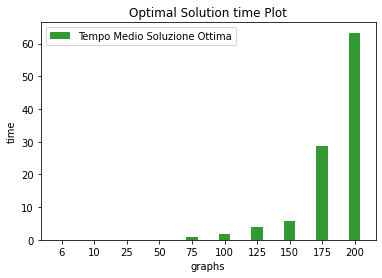

In [1]:
import plotLeo

## 5. L'errore nella soluzione trovata rispetto al risultato ottimo

L'errore è pari a zero per tutti i grafi ...

## 6. Conclusioni